<a href="https://colab.research.google.com/github/PotlachervuSrilatha/Credit_card_fraud_detection/blob/main/Credit_card_fraud_detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='maroon'>**CREDIT CARD FRAUD DETECTION PROJECT**</font>

In [1]:
# Importing the basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 500)

In [ ]:
##importing data
from google.colab import files
uploaded=files.upload()

## Reading and understanding the data

In [3]:
# Reading the dataset
df = pd.read_csv('Credit_card_fraud_detection.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,7.092545e-13,1.874948e-12,1.053347e-12,7.127611e-13,-1.474791e-13,-5.231558e-13,-2.282250e-13,-6.425436e-13,4.950748e-13,7.057397e-13,1.766111e-12,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df[['Amount', 'Time', 'Class']].describe()


,Amount,Time,Class
count,284807.000000,284807.000000,284807.000000
mean,88.349619,94813.859575,0.001727
std,250.120109,47488.145955,0.041527
min,0.000000,0.000000,0.000000
25%,5.600000,54201.500000,0.000000
50%,22.000000,84692.000000,0.000000
75%,77.165000,139320.500000,0.000000
max,25691.160000,172792.000000,1.000000


In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

In [10]:
df.mean()

Time      9.481386e+04
V1        1.759061e-12
V2       -8.251130e-13
V3       -9.654937e-13
V4        8.321385e-13
V5        1.649999e-13
V6        4.248366e-13
V7       -3.054600e-13
V8        8.777971e-14
V9       -1.179749e-12
V10       7.092545e-13
V11       1.874948e-12
V12       1.053347e-12
V13       7.127611e-13
V14      -1.474791e-13
V15      -5.231558e-13
V16      -2.282250e-13
V17      -6.425436e-13
V18       4.950748e-13
V19       7.057397e-13
V20       1.766111e-12
V21      -3.405756e-13
V22      -5.723197e-13
V23      -9.725856e-13
V24       1.464150e-12
V25      -6.987102e-13
V26      -5.617874e-13
V27       3.332082e-12
V28      -3.518874e-12
Amount    8.834962e+01
Class     1.727486e-03
dtype: float64

- Features like "Time" and "Amount" have values that directly represent time and transaction amounts, respectively.

- Features labeled "V1" through "V28" are typically anonymized features resulting from PCA (Principal Component Analysis) transformation for confidentiality purposes.

- the "Class" mean is very low, it suggests that the majority of transactions in your dataset are non-fraudulent. However, the mean alone doesn't provide sufficient information about which transactions are good or bad. You would need to further analyze the data, possibly using machine learning or statistical techniques, to identify patterns or anomalies that indicate fraudulent behavior.

In [11]:
df.median()

Time      84692.000000
V1            0.018109
V2            0.065486
V3            0.179846
V4           -0.019847
V5           -0.054336
V6           -0.274187
V7            0.040103
V8            0.022358
V9           -0.051429
V10          -0.092917
V11          -0.032757
V12           0.140033
V13          -0.013568
V14           0.050601
V15           0.048072
V16           0.066413
V17          -0.065676
V18          -0.003636
V19           0.003735
V20          -0.062481
V21          -0.029450
V22           0.006782
V23          -0.011193
V24           0.040976
V25           0.016594
V26          -0.052139
V27           0.001342
V28           0.011244
Amount       22.000000
Class         0.000000
dtype: float64

In [12]:
df.skew()

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

- Time:The skewness is approximately -0.036, indicating a slight left-skewed distribution, although close to symmetric.

- V1 to V28: These are anonymized features resulting from PCA transformation. Skewness values outside the range of -0.5 to 0.5 suggest significant skewness. For instance, V1, V2, V3, V5, V7, V8, V10, V11, V12, V14, V16, V17, V20, V21, V23, V24, V25, and V27 exhibit noticeable skewness.

- Amount: The skewness is approximately 16.978, indicating a highly right-skewed distribution. This suggests that there are very high transaction amounts in the dataset compared to the majority of transactions.

- Class: The skewness is approximately 23.998, indicating a highly right-skewed distribution. This suggests that fraudulent transactions are rare compared to non-fraudulent ones, which is expected in fraud detection datasets.
Understanding skewness helps in understanding the distribution of data,

In [13]:
df.kurtosis()

Time       -1.293530
V1         32.486679
V2         95.773106
V3         26.619551
V4          2.635455
V5        206.904560
V6         42.642494
V7        405.607417
V8        220.586974
V9          3.731311
V10        31.988239
V11         1.633921
V12        20.241870
V13         0.195300
V14        23.879462
V15         0.284769
V16        10.419131
V17        94.799719
V18         2.578341
V19         1.724970
V20       271.016113
V21       207.287040
V22         2.832967
V23       440.088659
V24         0.618871
V25         4.290412
V26         0.919006
V27       244.989241
V28       933.397502
Amount    845.092646
Class     573.887843
dtype: float64

- Time: The kurtosis is approximately -1.294, indicating a distribution with relatively light tails compared to a normal distribution.

- Amount: The kurtosis is approximately 845.093, indicating a distribution with very heavy tails and a large number of outliers.

- Class: The kurtosis is approximately 573.888, indicating a distribution with extremely heavy tails and a significant number of outliers, which is expected in fraud detection datasets where fraudulent transactions are rare compared to non-fraudulent ones.

In [14]:
df.std()

Time      47488.145955
V1            1.958696
V2            1.651309
V3            1.516255
V4            1.415869
V5            1.380247
V6            1.332271
V7            1.237094
V8            1.194353
V9            1.098632
V10           1.088850
V11           1.020713
V12           0.999201
V13           0.995274
V14           0.958596
V15           0.915316
V16           0.876253
V17           0.849337
V18           0.838176
V19           0.814041
V20           0.770925
V21           0.734524
V22           0.725702
V23           0.624460
V24           0.605647
V25           0.521278
V26           0.482227
V27           0.403632
V28           0.330083
Amount      250.120109
Class         0.041527
dtype: float64

- Time: The standard deviation is approximately 47,488.146, indicating a relatively wide spread of transaction times in the dataset.

- Amount: The standard deviation is approximately 250.120, indicating a considerable spread of transaction amounts in the dataset.
- Class: The standard deviation is approximately 0.042, indicating a very small variation in the labels indicating fraud or not fraud. This suggests that the majority of transactions are labeled consistently.

Understanding standard deviation helps in understanding the variability or dispersion of values in the dataset. High standard deviation values can indicate a wide range of values, while low standard deviation values suggest a more concentrated range of values around the mean.

In [15]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,3.777823e-12,-2.118614e-12,-1.733159e-13,-3.473231e-12,-1.306165e-13,-1.116494e-13,2.114527e-12,3.016285e-14,-2.615192e-12,1.866551e-12,-1.238745e-12,7.589589e-13,-1.871054e-13,-3.601390e-13,-1.142884e-12,1.671073e-12,-5.738830e-13,-2.770259e-12,2.662926e-13,-3.276238e-12,2.281863e-12,-2.969746e-12,-1.029876e-12,1.144179e-12,1.835263e-12,7.624804e-12,-9.769215e-13,-0.227709,-0.101347
V2,-0.010593,3.777823e-12,1.000000e+00,2.325661e-12,-2.314981e-12,-1.831952e-12,9.438444e-13,5.403436e-12,2.133785e-14,3.238513e-13,1.463282e-12,-8.314960e-13,6.139448e-13,-1.181068e-12,-3.384684e-13,2.196083e-13,-8.000510e-13,2.028957e-12,-1.916566e-14,-2.237098e-13,5.839893e-13,2.280202e-12,-2.548560e-13,-4.856120e-12,6.431308e-13,-9.423730e-13,-4.129100e-13,-9.856545e-13,2.525513e-12,-0.531409,0.091289
V3,-0.419618,-2.118614e-12,2.325661e-12,1.000000e+00,2.046235e-13,-4.032993e-12,-1.574471e-13,3.405586e-12,-1.272385e-12,-6.812351e-13,-1.609126e-12,8.707055e-13,-2.730043e-12,-1.020592e-12,-5.597874e-13,6.442512e-13,-8.748795e-13,-1.058101e-12,-8.846578e-13,-1.061131e-12,1.873059e-12,6.736294e-13,-8.909339e-13,4.147209e-12,3.407636e-12,5.712956e-13,-2.577274e-12,-5.041444e-12,5.189109e-12,-0.210880,-0.192961
V4,-0.105260,-1.733159e-13,-2.314981e-12,2.046235e-13,1.000000e+00,-2.552389e-13,1.084041e-12,8.135064e-13,7.334818e-13,-7.143069e-13,-1.938143e-12,1.874473e-12,5.393827e-13,6.813810e-13,-1.404120e-12,1.526382e-12,3.095722e-13,1.151414e-14,-1.309615e-12,-9.754131e-13,-2.347029e-12,-2.696370e-12,4.347776e-13,-4.160969e-12,-2.368743e-12,1.619944e-12,-3.043100e-13,-1.456066e-12,-2.832372e-12,0.098732,0.133447
V5,0.173072,-3.473231e-12,-1.831952e-12,-4.032993e-12,-2.552389e-13,1.000000e+00,-6.934789e-14,1.573956e-11,-2.038243e-12,-1.000756e-12,-7.200329e-13,-5.928181e-13,1.812994e-12,-7.021996e-14,-1.113015e-13,-1.593594e-12,-1.619090e-14,1.713794e-13,1.101433e-12,5.956033e-13,-1.728728e-13,-1.751796e-12,7.095269e-13,3.616075e-12,-2.808776e-13,1.451126e-12,-1.896141e-13,-2.124559e-12,1.010196e-11,-0.386356,-0.094974
V6,-0.063016,-1.306165e-13,9.438444e-13,-1.574471e-13,1.084041e-12,-6.934789e-14,1.000000e+00,-2.798968e-12,-5.446480e-13,2.036743e-12,7.429770e-13,1.014893e-12,-9.265590e-13,1.484679e-12,-1.212766e-12,-1.053548e-12,1.374197e-12,7.431528e-13,6.859871e-13,1.148589e-12,-2.382062e-12,1.476858e-12,-1.144797e-12,-1.527842e-12,1.551854e-12,-2.723707e-12,3.351239e-12,1.481307e-12,-6.069227e-13,0.215981,-0.043643
V7,0.084714,-1.116494e-13,5.403436e-12,3.405586e-12,8.135064e-13,1.573956e-11,-2.798968e-12,1.000000e+00,5.528803e-12,5.088082e-13,1.674650e-12,-8.525291e-13,-2.826770e-13,-8.171731e-13,2.038217e-12,1.074440e-12,-1.478776e-12,-1.231314e-12,-4.281952e-13,-3.742188e-12,8.068665e-12,2.788246e-12,-8.133209e-13,-4.293094e-12,-2.553518e-12,-7.406970e-13,-4.476467e-12,-1.328637e-11,2.958679e-13,0.397311,-0.187257
V8,-0.036949,2.114527e-12,2.133785e-14,-1.272385e-12,7.334818e-13,-2.038243e-12,-5.446480e-13,5.528803e-12,1.000000e+00,-2.243172e-12,-1.660630e-12,1.296877e-12,-3.860109e-13,7.722897e-13,-2.596182e-12,1.648898e-12,-1.830899e-12,7.025405e-13,1.499555e-12,1.988417e-12,-1.884661e-13,-4.022440e-12,-2.679560e-12,9.013064e-13,-1.074365e-12,-3.268979e-12,1.043839e-12,-3.499804e-12,1.866598e-12,-0.103079,0.019875
V9,-0.008660,3.016285e-14,3.238513e-13,-6.812351e-13,-7.143069e-13,-1.000756e-12,2.036743e-12,5.088082e-13,-2.243172e-12,1.000000e+00,1.185391e-12,-3.970652e-13,-1.904908e-12,8

# Percentage of Total Not Fraud Transcaton

In [16]:
nfcount=0
notFraud=df["Class"]
for i in range(len(notFraud)):
  if notFraud[i]==0:
    nfcount=nfcount+1

nfcount
per_nf=(nfcount/len(notFraud))*100
print("Percentage of total not fraud transcation in the dataset:",per_nf)

Percentage of total not fraud transcation in the dataset: 99.82725143693798


# Percentage of Total Fraud Transcaton

In [17]:
fcount=0
Fraud=df["Class"]
for i in range(len(Fraud)):
  if Fraud[i]==1:
    fcount=fcount+1

fcount
per_f=(fcount/len(Fraud))*100
print("Percentage of total fraud transcation in the dataset:",per_f)

Percentage of total fraud transcation in the dataset: 0.1727485630620034


In [18]:
plot_df=pd.DataFrame()
plot_df["Fraud Transaction"]=Fraud
plot_df["Genuine Transaction"]=notFraud
plot_df

,Fraud Transaction,Genuine Transaction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
284802,0,0
284803,0,0
284804,0,0
284805,0,0


In [19]:
print(plot_df.columns)

Index(['Fraud Transaction', 'Genuine Transaction'], dtype='object')


<Axes: title={'center': 'Bar plot for VS Genuine transaction'}, xlabel='Fraud Transaction', ylabel='Genuine Transaction'>

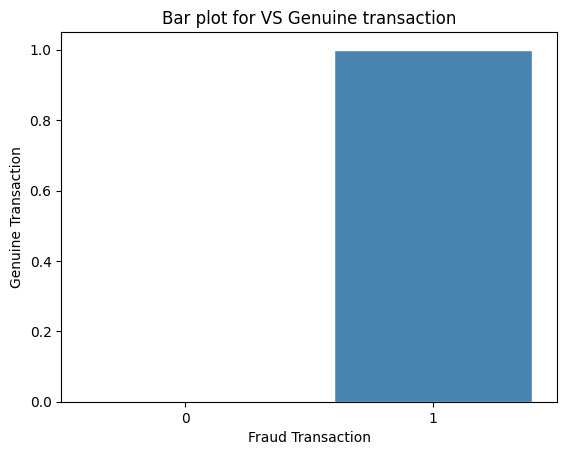

In [20]:
plt.title("Bar plot for VS Genuine transaction")
sns.barplot(x="Fraud Transaction", y="Genuine Transaction", data=plot_df, palette="Blues", edgecolor="w")

As per the graph we can say the ratio of genuine transcation are higher than fraud transactions

Text(0.5, 1.0, 'Time VS Amount')

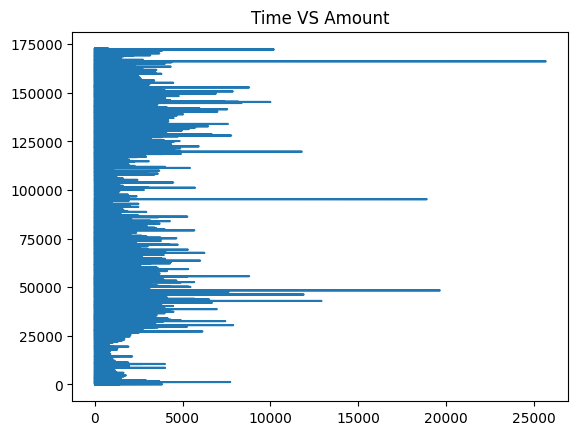

In [21]:
x=df["Amount"]
y=df["Time"]
plt.plot(x,y)
plt.title("Time VS Amount")
# sns.barplot(X=x,y=y,data=df,palette="Blues",edgecolor="W")

In this graph we try to plot the relation between Time and the amount

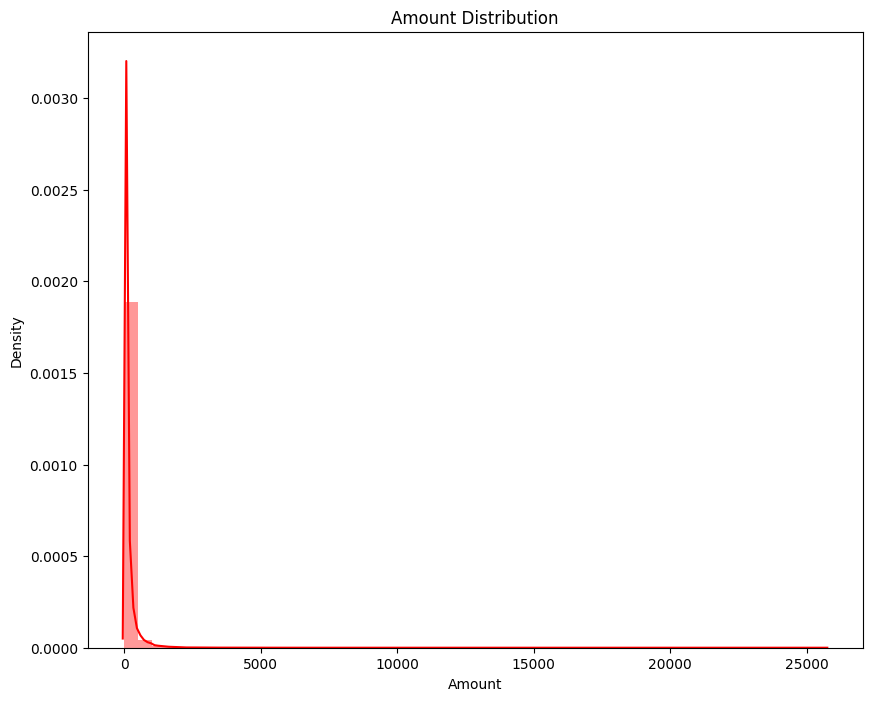

In [22]:
plt.figure(figsize=(10,8),)
plt.title("Amount Distribution")
sns.distplot(df["Amount"],color="red");

From this amount distribution curve it is shown that the number high amount transaction are very low. So there is high probability for huge transaction to be fraudulent.

#OUTLIERS

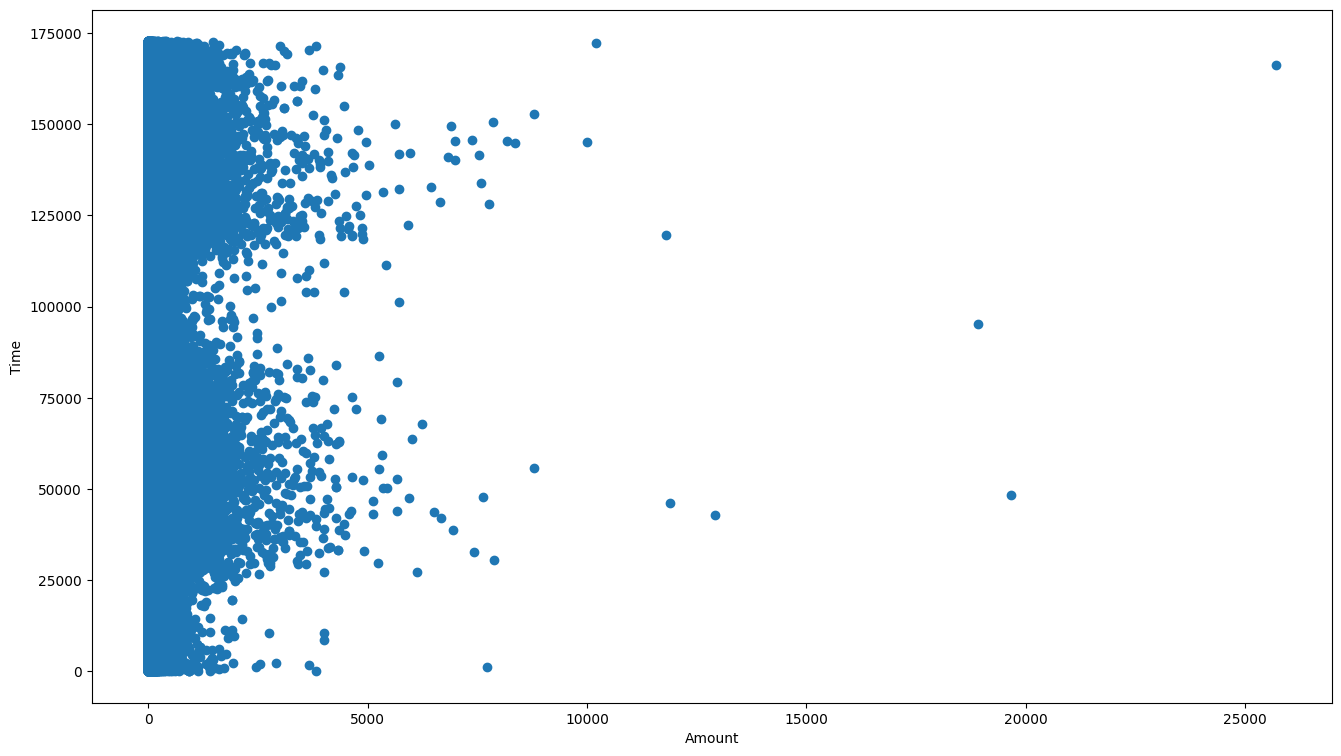

In [23]:
fig,ax=plt.subplots(figsize=(16,9))
ax.scatter(df["Amount"],df["Time"])
ax.set_xlabel("Amount")
ax.set_ylabel("Time")
plt.show()


Correlation matrix

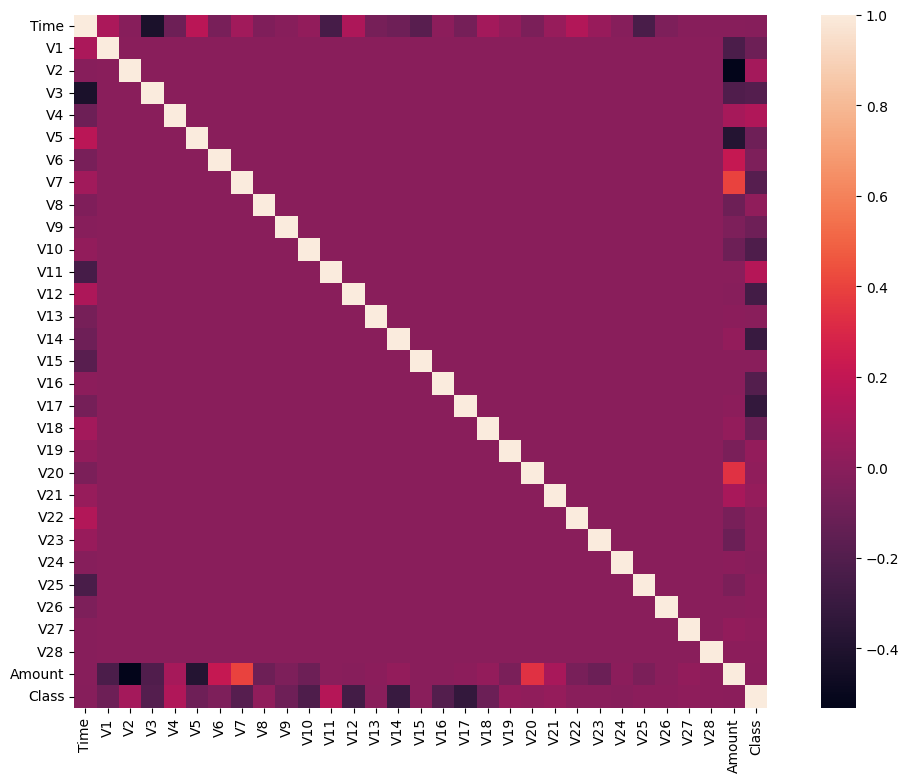

In [24]:
correlation_metrics=df.corr()
fig=plt.figure(figsize=(14,9))
sns.heatmap(correlation_metrics,square=True)
plt.show()


Correlation metrics help us to understand the correlation between two attributes.

# TO start with modelling First we need to split the dataset

#80%----> 80% of the date will use to train the model
#20%----> 20% to validate the model

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x=df.drop(["Class"],axis=1) #Drop the target variable
y-df["Class"]
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate the LogisticRegression model
logisticreg = LogisticRegression()

# Fit the model with the training data
logisticreg.fit(xtrain, ytrain)

In [ ]:
y_pred=logisticreg.predict(xtest)
accuracy=logisticreg.score(xtest,ytest)

In [ ]:
cm=metrics.confusion_matrix(ytest,y_pred)
print(cm)

Accuracy calculation

In [ ]:
print("Accuracy score of the Logistic Regression model:", accuracy*100,'%')